In [1]:
#load data from excel format
import pandas as pd
import numpy as np
df = pd.read_excel(open('default of credit card clients.xls','rb'),sheetname='Data') 
df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [2]:
# select feature list
feature_list = ['X6', 
'X7', 
'X8',
'X9',
'X10' ,
'X11' ,
'X1'  ,
'X18' ,
'X19' ,
'X21' ,
'X20' ,
'X22' ,
'X23' ,
'X2'  ,
'X3'  ,
'X4'  ,
'X12' ,
'X13' ,
'X14' ]



In [3]:
# using selected feature to get new features 
X = df[feature_list]
y = df.Y


In [4]:
# using 10 -times cross validation to check the decision tree classifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing


l = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    min_max_scaler = preprocessing.RobustScaler()
    x_train_scaled = min_max_scaler.fit_transform(X_train[X_train.columns[0:19]])
    x_test_scaled = min_max_scaler.fit_transform(X_test[X_test.columns[0:19]])
    X_train_robust = pd.DataFrame(x_train_scaled)
    X_test_robust = pd.DataFrame(x_test_scaled)
    
    tree = DecisionTreeClassifier(max_depth = 5)
    tree.fit(X_train_robust, y_train)
    y_pred_class = tree.predict(X_test_robust)

    l.append(f1_score(y_test, y_pred_class, average='micro'))
    print('Round{} : '.format(i))
    print(tree.score(X_train_robust,y_train))
    print(tree.score(X_test_robust,y_test))
    print(f1_score(y_test, y_pred_class, average='micro'))
    print(metrics.classification_report(y_test, y_pred_class))
    print('#################################')
print(sum(l)/10)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Round0 : 
0.8285
0.807666666667
0.807666666667
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      4609
          1       0.67      0.34      0.45      1391

avg / total       0.79      0.81      0.78      6000

#################################
Round1 : 
0.821958333333
0.829166666667
0.829166666667
             precision    recall  f1-score   support

          0       0.85      0.95      0.90      4700
          1       0.70      0.38      0.49      1300

avg / total       0.81      0.83      0.81      6000

#################################
Round2 : 
0.824375
0.823833333333
0.823833333333
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      4701
          1       0.67      0.36      0.47      1299

avg / total       0.81      0.82      0.80      6000

#################################
Round3 : 
0.824916666667
0.819166666667
0.819166666667
             precision    recall  f1-score   su

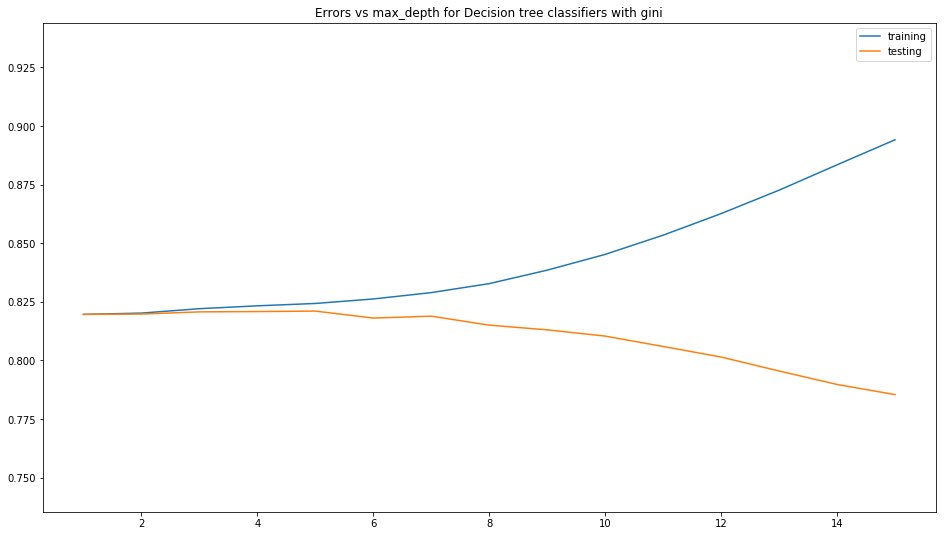

In [5]:
# find the optimal depth with gini method
# #select the optimal depth for decision tree 'gini' method
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
#scalar Before classification, we need to normalize the data first.
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

#cross validation seed
n_folds = 10
kf = KFold(n=len(X), n_folds=n_folds, shuffle=True, random_state=42)
#Decisiontree classifier
def test_Decisiontree(train_X, train_y, test_X, test_y, criterion='gini',max_depth=5, debug_flag = False):
    tree = DecisionTreeClassifier(criterion = criterion,max_depth=max_depth)
    tree.fit(train_X, train_y)
    train_error = tree.score(train_X, train_y)
    test_error = tree.score(test_X, test_y)
    if debug_flag:
        print('=============')
        print('training error:\t{}'.format(train_error))
        print('testing error:\t{}'.format(test_error))
    return train_error, test_error
def cv(criterion='gini',max_depth=5):
    train_error_total = 0
    test_error_total = 0
    for train, test in kf:
        train_X = X_scaled[train]
        test_X = X_scaled[test]
        train_y = y.iloc[train]
        test_y = y.iloc[test]
        train_error, test_error = test_Decisiontree(train_X, train_y, test_X, test_y,criterion,max_depth)
        train_error_total += train_error
        test_error_total += test_error
    return train_error_total/n_folds, test_error_total/n_folds
def cv_plot(criterion='gini'):
    cv_res = []
    for i in range(1,16):
        train_error, test_error = cv('gini',i)
        cv_res.append([i, train_error, test_error])
    cv_res_arr = np.array(cv_res)
    plt.figure(figsize=(16,9)) 
    plt.title('Errors vs max_depth for Decision tree classifiers with gini')
    plot_train, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,1], label='training')
    plot_test, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,2], label='testing')
    plt.legend(handles=[plot_train, plot_test])
    plt.ylim((min(min(cv_res_arr[:,1]), min(cv_res_arr[:,2])) - 0.05, max(max(cv_res_arr[:,1]), max(cv_res_arr[:,2]))+0.05))
cv_plot('gini')

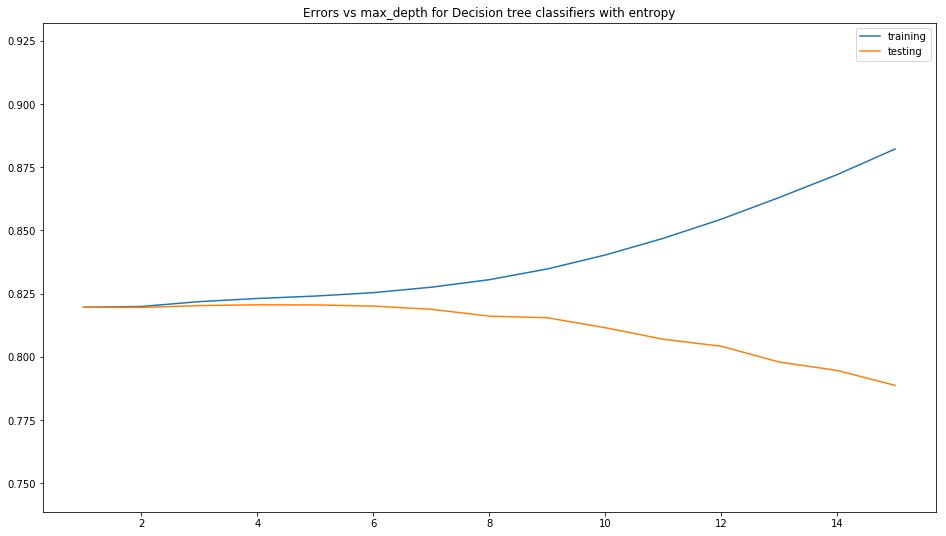

In [6]:
#select the optimal depth for decision tree 'entropy' method
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
#scalar Before classification, we need to normalize the data first.
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

#cross validation seed
n_folds = 10
kf = KFold(n=len(X), n_folds=n_folds, shuffle=True, random_state=42)
#Decisiontree classifier
def test_Decisiontree(train_X, train_y, test_X, test_y, criterion='entropy',max_depth=5, debug_flag = False):
    tree = DecisionTreeClassifier(criterion = criterion,max_depth=max_depth)
    tree.fit(train_X, train_y)
    train_error = tree.score(train_X, train_y)
    test_error = tree.score(test_X, test_y)
    if debug_flag:
        print('=============')
        print('training error:\t{}'.format(train_error))
        print('testing error:\t{}'.format(test_error))
    return train_error, test_error
def cv(criterion='entropy',max_depth=5):
    train_error_total = 0
    test_error_total = 0
    for train, test in kf:
        train_X = X_scaled[train]
        test_X = X_scaled[test]
        train_y = y.iloc[train]
        test_y = y.iloc[test]
        train_error, test_error = test_Decisiontree(train_X, train_y, test_X, test_y,criterion,max_depth)
        train_error_total += train_error
        test_error_total += test_error
    return train_error_total/n_folds, test_error_total/n_folds
def cv_plot(criterion='entropy'):
    cv_res = []
    for i in range(1,16):
        train_error, test_error = cv('entropy',i)
        cv_res.append([i, train_error, test_error])
    cv_res_arr = np.array(cv_res)
    plt.figure(figsize=(16,9)) 
    plt.title('Errors vs max_depth for Decision tree classifiers with entropy')
    plot_train, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,1], label='training')
    plot_test, = plt.plot(cv_res_arr[:,0], cv_res_arr[:,2], label='testing')
    plt.legend(handles=[plot_train, plot_test])
    plt.ylim((min(min(cv_res_arr[:,1]), min(cv_res_arr[:,2])) - 0.05, max(max(cv_res_arr[:,1]), max(cv_res_arr[:,2]))+0.05))
cv_plot('entropy')